In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("Resources/heart_failure_clinical_records_dataset.csv")
data.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [3]:
Sex - Gender of patient Male = 1, Female =0
Age - Age of patient
Diabetes - 0 = No, 1 = Yes
Anaemia - 0 = No, 1 = Yes
High_blood_pressure - 0 = No, 1 = Yes
Smoking - 0 = No, 1 = Yes
DEATH_EVENT - 0 = No, 1 = Yes

SyntaxError: invalid syntax (680620537.py, line 1)

In [4]:
data.columns.tolist()

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

In [5]:
X = data[['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',]]
y = data['DEATH_EVENT']

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

std = StandardScaler()
X = std.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10)

In [9]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix
cnf = confusion_matrix
cnf(y_pred, y_test)

array([[44,  8],
       [ 4, 19]], dtype=int64)

In [11]:
accuracy_score(y_pred, y_test)

0.84

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [52]:
data.hvplot.bar(
    x='age',
    y='ejection_fraction',
    by='DEATH_EVENT',
    width=900,
    height=200,
    subplots=True,
    fontscale=0.7
).cols(2)

:NdLayout   [DEATH_EVENT]
   :Bars   [age]   (ejection_fraction)

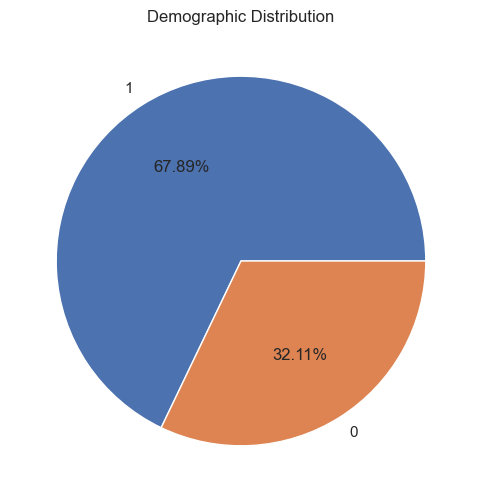

In [61]:
plt.figure(figsize=(50,6))
plt.pie(x=data.DEATH_EVENT.value_counts().values,labels=data.DEATH_EVENT.unique().tolist(),autopct='%1.2f%%')
plt.title('Demographic Distribution')
plt.show()

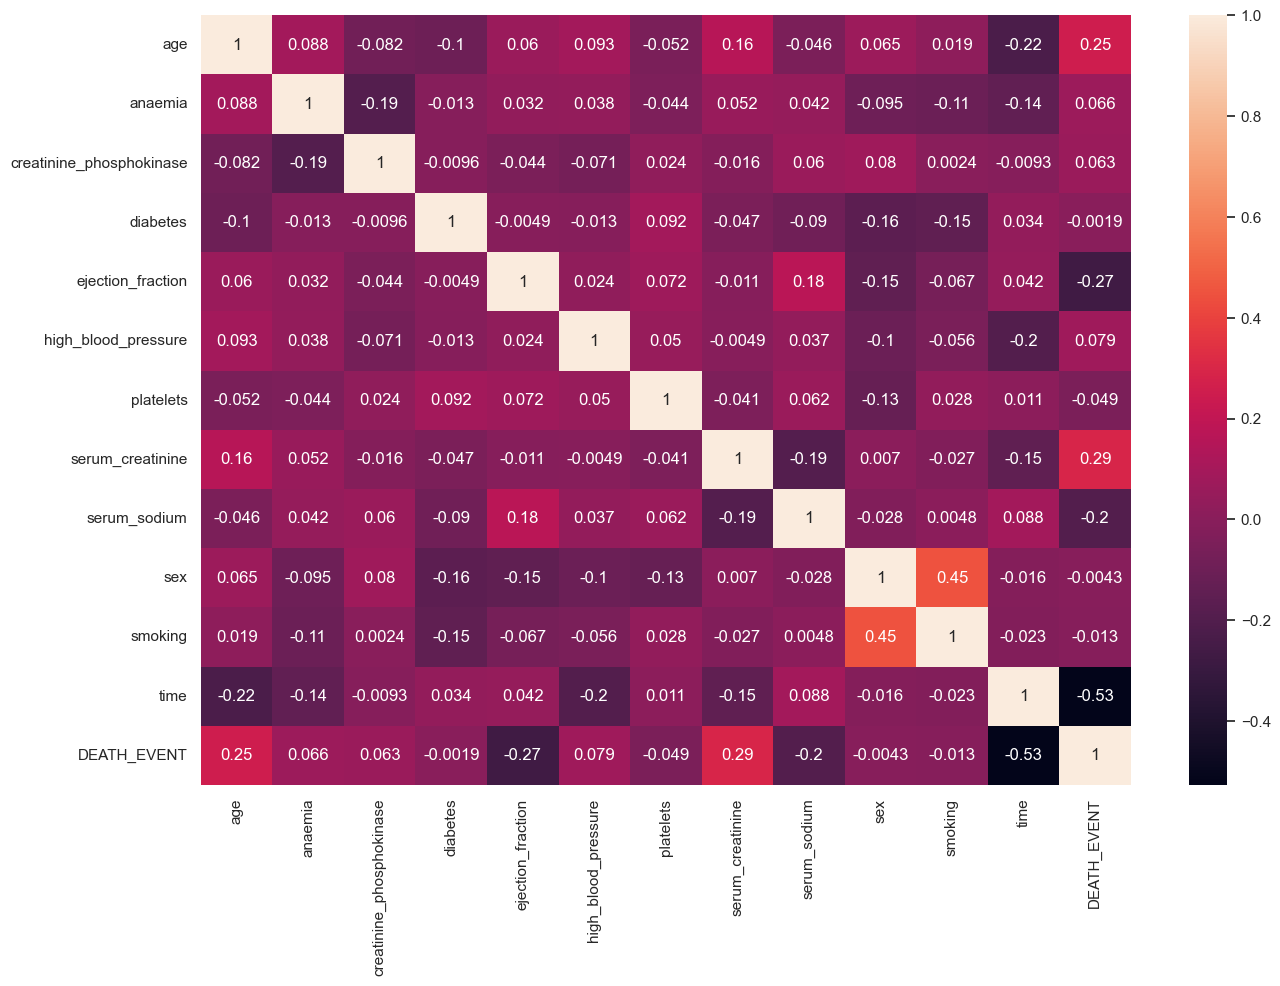

In [79]:
sns.heatmap(data.corr(), annot=True)
sns.set(font_scale=2)
sns.set (rc = {'figure.figsize':(5, 10)})

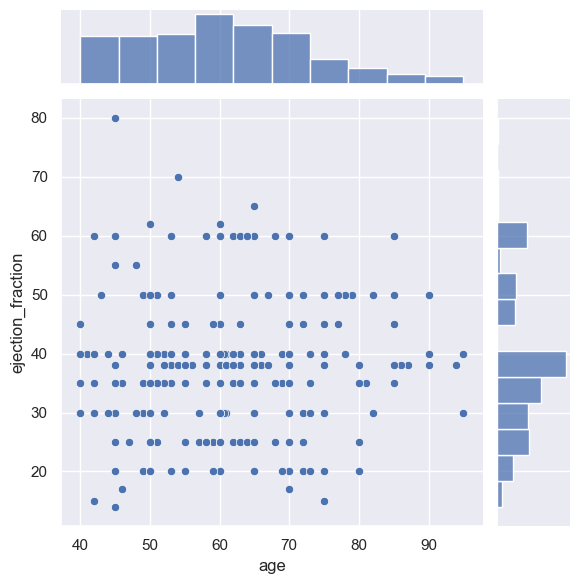

In [15]:
sns.jointplot(x='age', y='ejection_fraction', data=data)

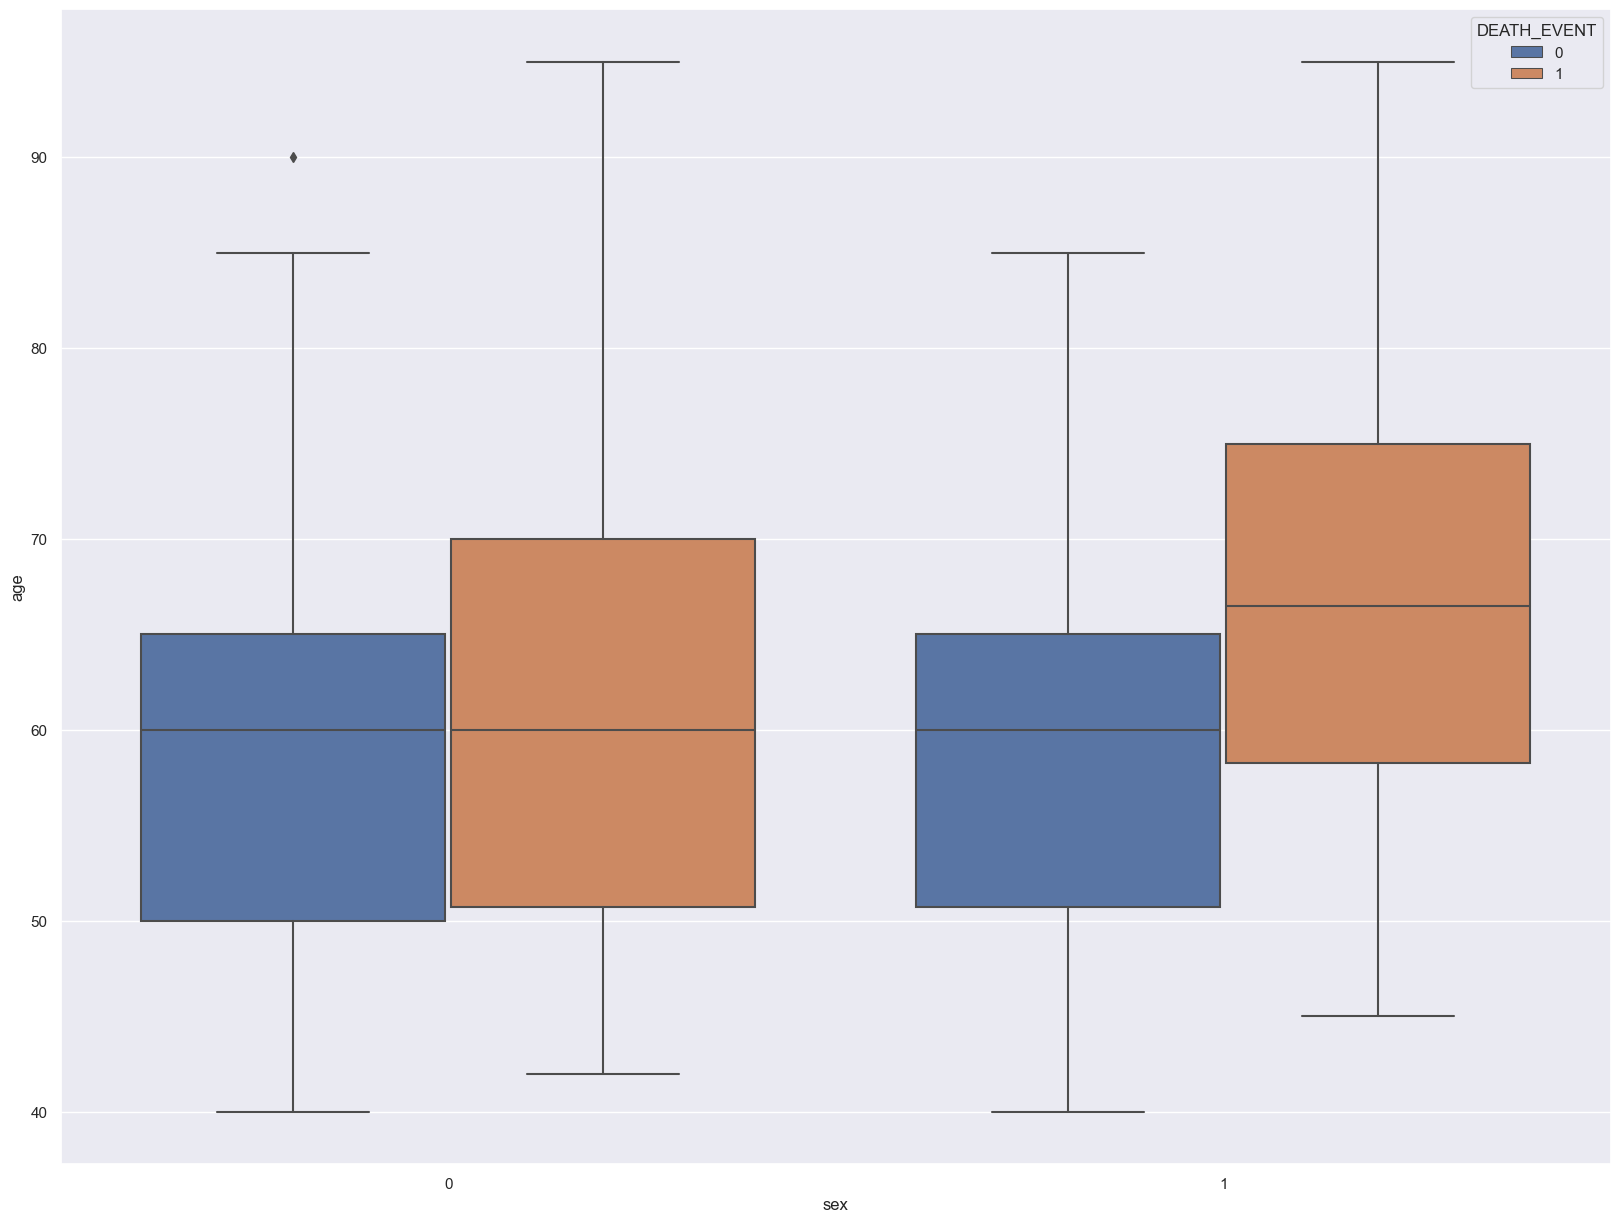

In [16]:
sns.boxplot(x='sex', y='age', hue = 'DEATH_EVENT',data=data)
sns.set (rc = {'figure.figsize':(1, 5)})

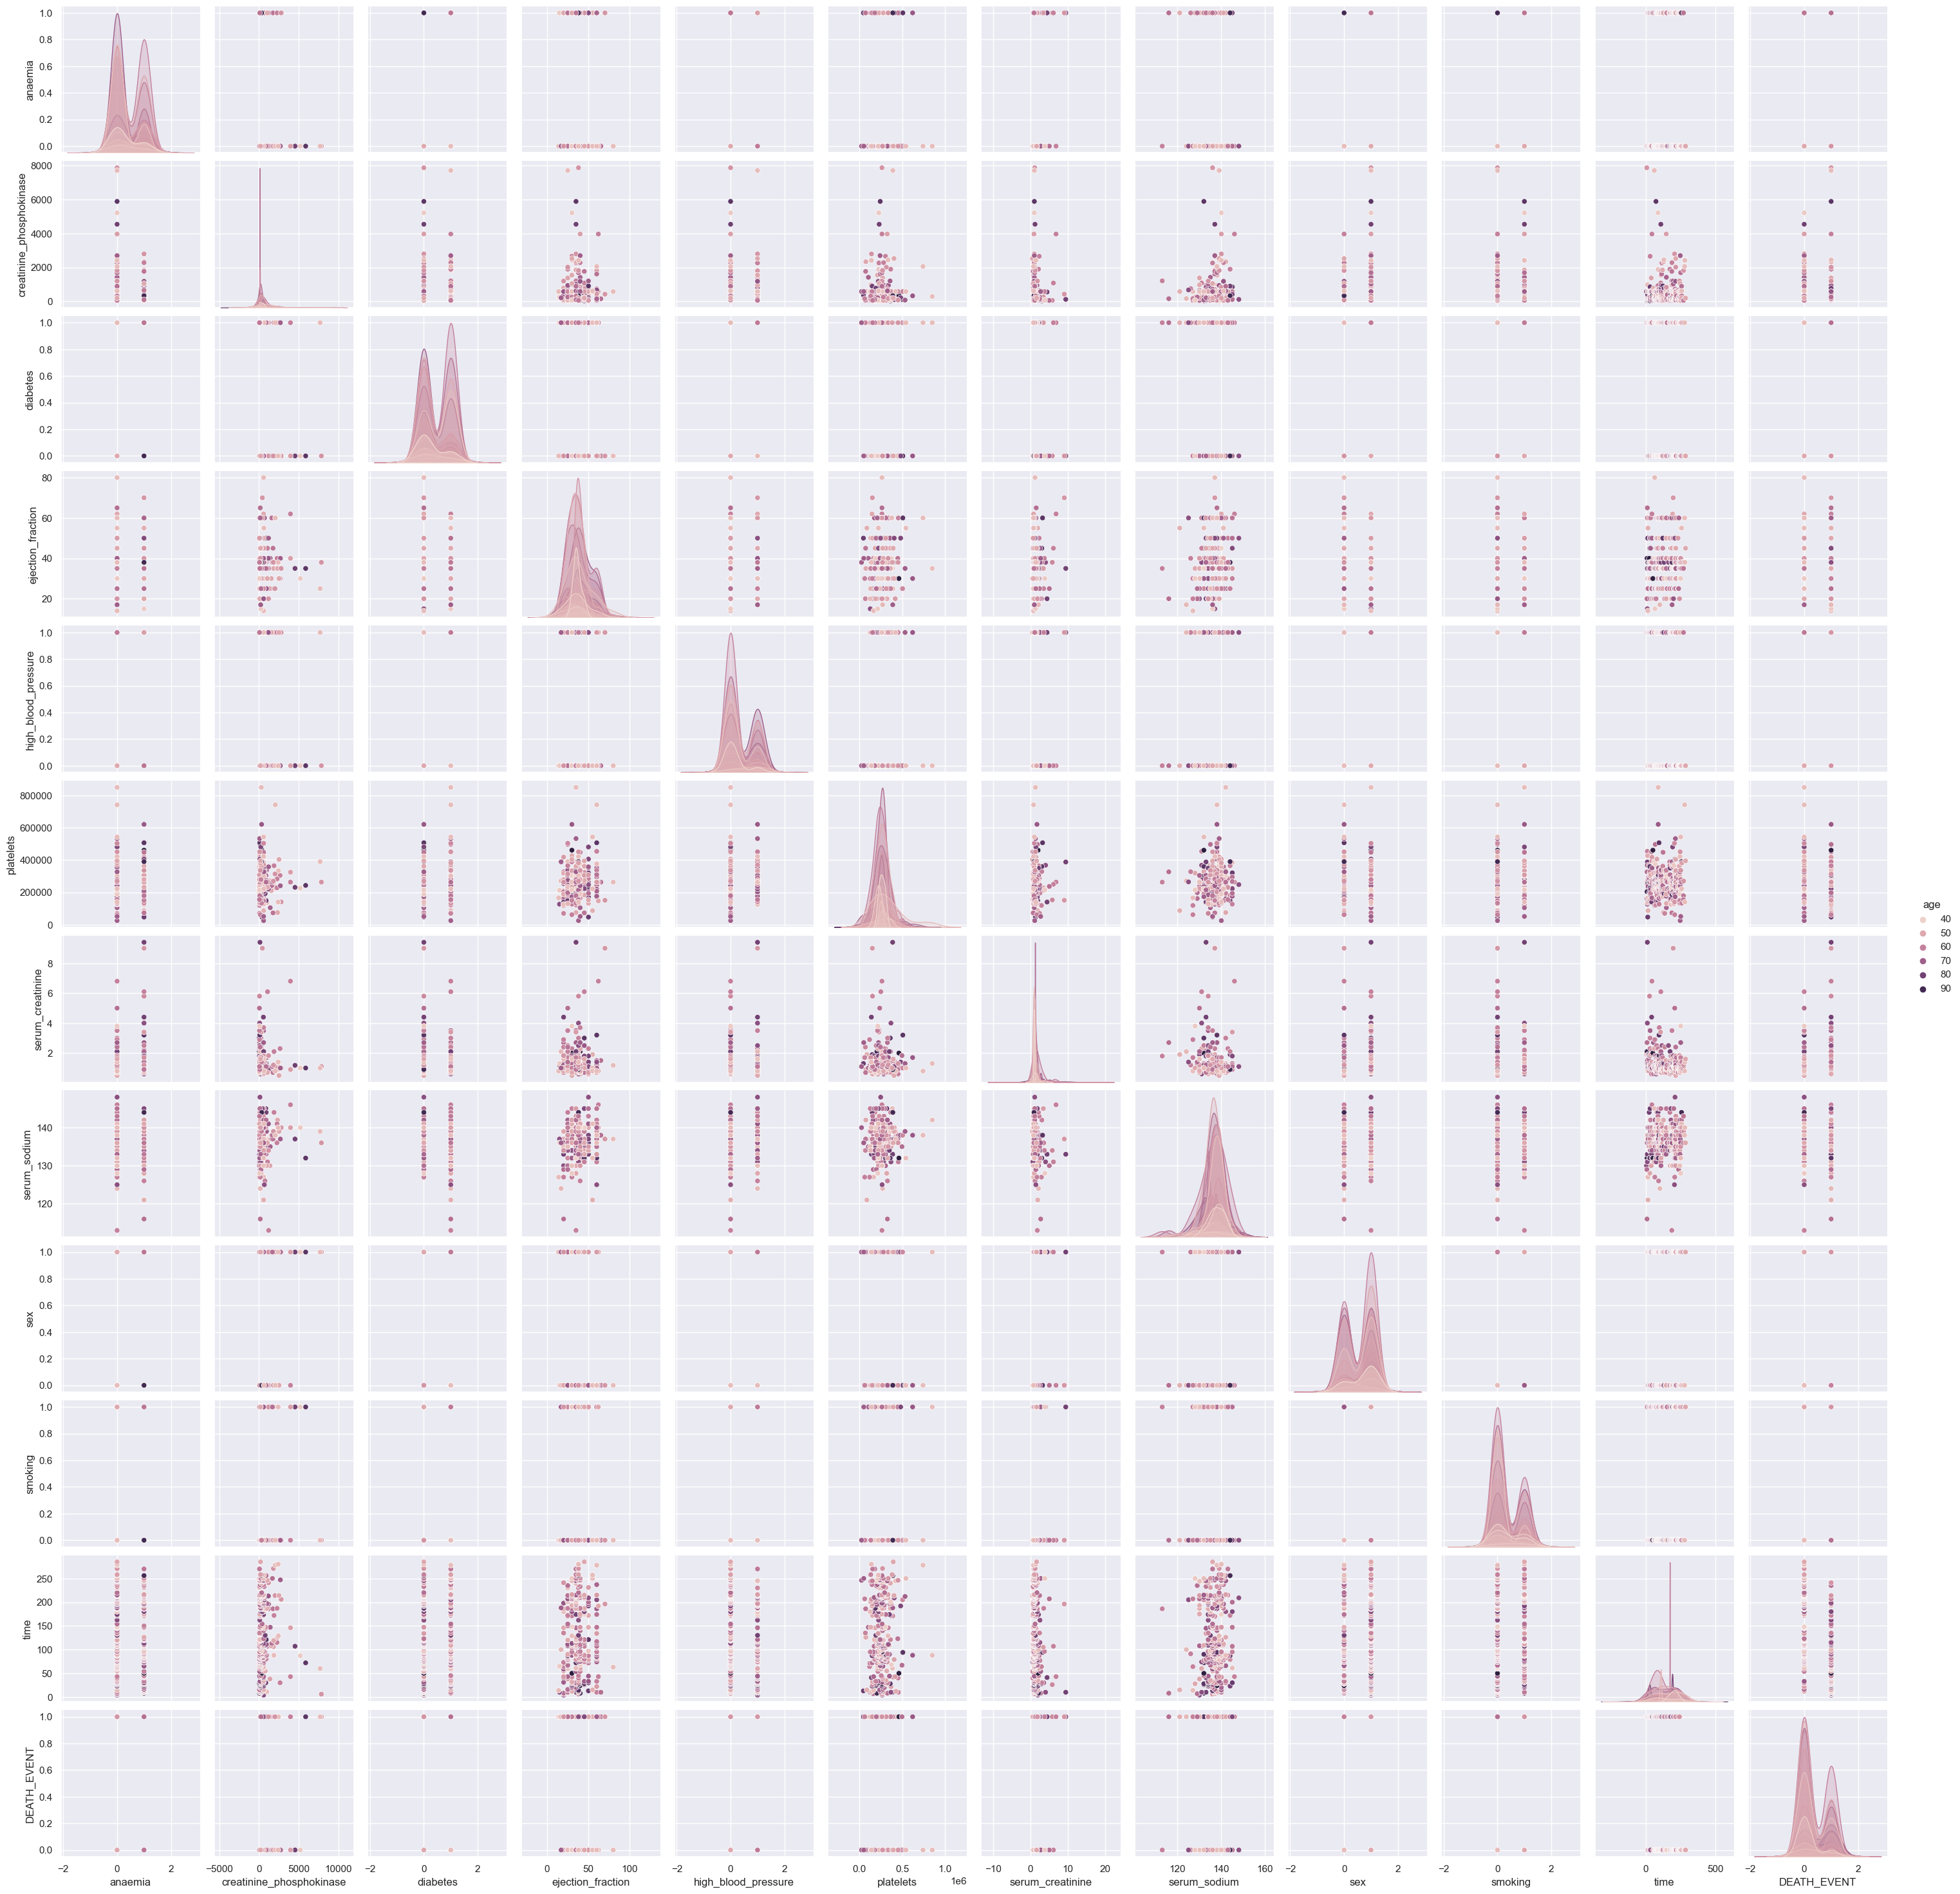

In [17]:
sns.pairplot(data, hue='age')
plt.show(5)

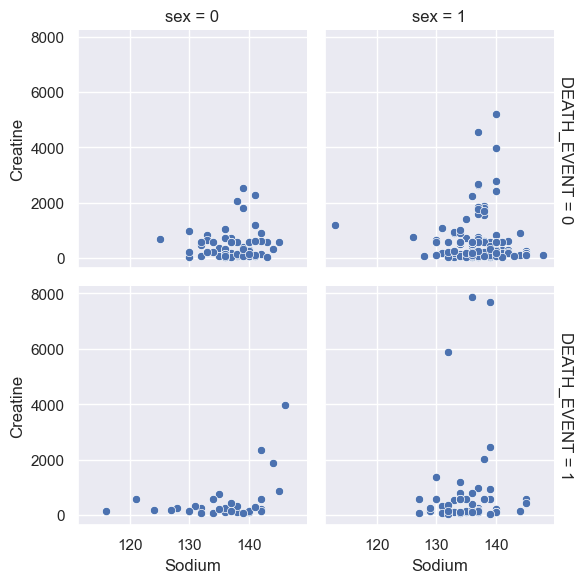

In [18]:
g = sns.FacetGrid(data, col='sex', row='DEATH_EVENT', margin_titles=True)
g.map_dataframe(sns.scatterplot, x='serum_sodium', y='creatinine_phosphokinase')
g.set_axis_labels('Sodium', 'Creatine')
plt.show()